In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import ListedColormap, colorConverter
import seaborn as sns

from sklearn import datasets
from sklearn.datasets import make_blobs, load_iris, make_moons, fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC, SVC, LinearSVR, OneClassSVM

In [2]:
semilla = 675

In [3]:
datos = fetch_20newsgroups()
print(datos.target_names)
# Las clases que tiene el target
categorias = ['talk.religion.misc', 'soc.religion.christian','sci.space','comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categorias)
test = fetch_20newsgroups(subset='test', categories=categorias)
print(train.data[5])

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919

In [4]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

###  EJEMPLO 7: Usar un modelo Naive Bayes Gausiano con el dataset iris.

In [5]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=semilla)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Hay %d ejemplos mal clasificados de %d" % ((y_test != y_pred).sum(), X_test.shape[0]) )

Hay 0 ejemplos mal clasificados de 75


### EJEMPLO 8: Vamos a clasificar correos en spam o no fijándonos en las palabras que contienen.
Tenemos un total de 12 correos, 8 de ellos son normales y 4 son spam. Entrenamos un modelo Naive
Bayes Multinomial y necesitamos contear las apariciones de cada palabra significativa que aparezca
en cualquiera de los correos.

 En cuanto a los correos normales tenemos:

 • 8 correos normales.

 • Palabra "Dear" aparece 8: 8/17 = 0.47

• Palabra "Friend" aparece 5: 5/17 = 0.29

 • Palabra "Lunch" aparece 3: 3/17 = 0.17

 • La palabra "Money" aparece 1: 1/17 = 0.058

 En cuanto a los spam:

 • 4 correos spam.

 • Palabra "Dear" aparece 2: 2/7 = 0.29

 • Palabra "Friend" aparece 1: 1/7 = 0.14

 • Palabra "Lunch" aparece 0: 0/7 = 0

 • La palabra "Money" aparece 4: 4/7 = 0.57

### EJEMPLO 9: Usamos contadores de palabras de 20 noticias de un foro para ver como clasifica

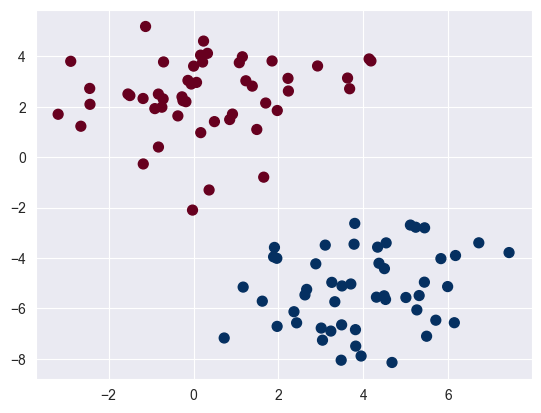

In [6]:
X, y = make_blobs(100, 2, centers=2,random_state=semilla,
cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50,cmap='RdBu');

(np.float64(-3.7210824010284265),
 np.float64(7.96638877416713),
 np.float64(-8.80893692357105),
 np.float64(5.852118818719206))

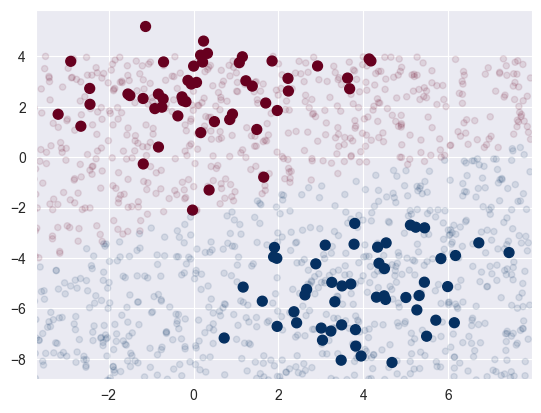

In [7]:
modelo = GaussianNB()
modelo.fit(X, y);
# Ahora generamos nuevos datos y predecimos su etiqueta
rng = np.random.RandomState(0)
nuevo_X = [-6, -14] + [14, 18] * rng.rand(2000, 2)
nuevo_y = modelo.predict(nuevo_X)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
limite = plt.axis()
plt.scatter(nuevo_X[:, 0], nuevo_X[:, 1], c=nuevo_y, s=20, cmap='RdBu', alpha=0.1)
plt.axis(limite)

In [8]:
y_proba = modelo.predict_proba(nuevo_X)
print(y_proba[-8:].round(2)) # salida: [[ 0.89, 0.11], [1. , 0.], … [0.15, 0.85]]

[[0.88 0.12]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [0.   1.  ]
 [1.   0.  ]
 [0.   1.  ]]


In [9]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=semilla)
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)
print("Hay %d ejemplos mal clasificados de %d" % ((y_test != y_pred).sum(), X_test.shape[0]) )

Hay 0 ejemplos mal clasificados de 75


In [10]:
datos = fetch_20newsgroups()
print(datos.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [11]:
categorias = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categorias)
test = fetch_20newsgroups(subset='test', categories=categorias)

In [12]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [13]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [14]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(113.9222222222222, 0.5, 'Label predicha')

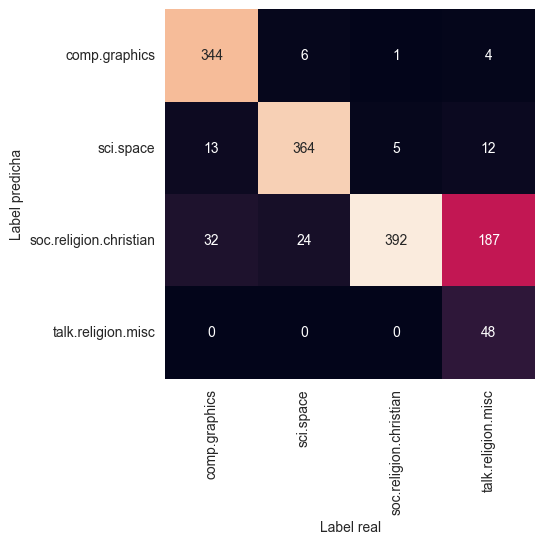

In [15]:
mc = confusion_matrix(test.target, labels)
sns.heatmap(mc.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('Label real')
plt.ylabel('Label predicha')

In [16]:
def predice_categoria(texto, train=train, model=modelo):
    pred = model.predict([texto])
    return train.target_names[pred[0]]

In [17]:
# Pruebas
#print(predice_categoria('sending a payload to the ISS'))      # 'sci.space'
#print(predice_categoria('discussing islam vs atheism'))      # 'soc.religion.christian'
#print(predice_categoria('determining the screen resolution')) # 'comp.graphics'

 ### EJEMPLO 10: Crear y entrenar un modelo LinearSVC.


In [18]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # longitud y anchura de pétalos
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

svm_clf.fit(X, y)

print(svm_clf.predict([[5.5, 1.7]]))

[1.]


### EJEMPLO 11: Creamos el fichero u03_util.py donde implementamos varias funciones de dibujo

In [19]:
cm2 = ListedColormap(['#0000aa', '#ff2020'])

In [20]:
def discrete_scatter(x1, x2, y=None, markers=None, s=10, ax=None, labels=None, padding=.2, alpha=1, c=None, markeredgewidth=None):
    if ax is None:
        ax = plt.gca()
    if y is None:
        y = np.zeros(len(x1))
    if markers is None:
        markers = ['o', '^', 'v', 'D', 's', '*', 'p', 'h', 'H', '8', '<', '>'] * 10
    if len(markers) == 1:
        markers = markers * len(np.unique(y))
    if labels is None:
        labels = np.unique(y)
    lineas = []
    for i, (yy, cycle) in enumerate(zip(np.unique(y), mpl.rcParams['axes.prop_cycle']())):
        mask = y == yy
        if c is None:
            color = cycle['color']
        elif len(c) > 1:
            color = c[i]
        else:
            color = c
        # si c es none, usa colores repetidos
        if np.mean(colorConverter.to_rgb(color)) < .4:  # frontera clara si marker oscuro
            markeredgecolor = "grey"
        else:
            markeredgecolor = "black"
        lineas.append(ax.plot(x1[mask], x2[mask], markers[i], markersize=s, label=labels[i], alpha=alpha, c=color,markeredgewidth=markeredgewidth, markeredgecolor=markeredgecolor)[0])
    if padding != 0:
        pad1 = x1.std() * padding
        pad2 = x2.std() * padding
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        ax.set_xlim(min(x1.min() - pad1, xlim[0]), max(x1.max() + pad1, xlim[1]))
        ax.set_ylim(min(x2.min() - pad2, ylim[0]), max(x2.max() + pad2, ylim[1]))
    return lineas

In [21]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None, linestyle="solid"):
    if eps is None:
        eps = X.std() / 2.
    if ax is None:
        ax = plt.gca()
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

In [22]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=14)
    plt.ylabel(r"$x_2$", fontsize=14, rotation=0)

In [23]:
def plot_predicciones(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

###  EJEMPLO 12: Generar y dibujar datos linealmente no separables en 2D.


[]

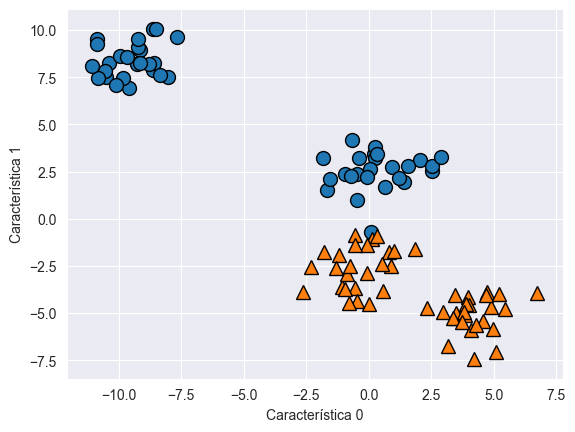

In [24]:
X, y = make_blobs(centers=4, random_state=semilla)
y = y % 2
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.plot()

### EJEMPLO 13: Crear y entrenar un modelo clasificador SVM para los datos del EJEMPLO 12.

Text(0, 0.5, 'Característica 1')

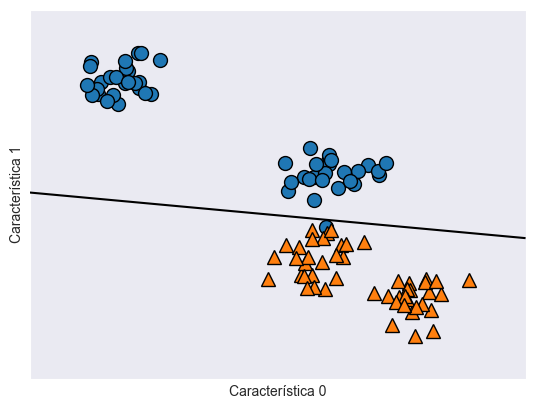

In [25]:
lineal_svm = LinearSVC().fit(X, y)
plot_2d_separator(lineal_svm, X)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

### EJEMPLO 14: Crear y entrenar un modelo clasificador SVM para los datos del EJEMPLO 12.

C:\Users\ESP\AppData\Local\Temp\ipykernel_1940\334143281.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b', cmap= cm2, s=60, edgecolor='k')
C:\Users\ESP\AppData\Local\Temp\ipykernel_1940\334143281.py:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r', marker='^', cmap=cm2, s=60, edgecolor='k')


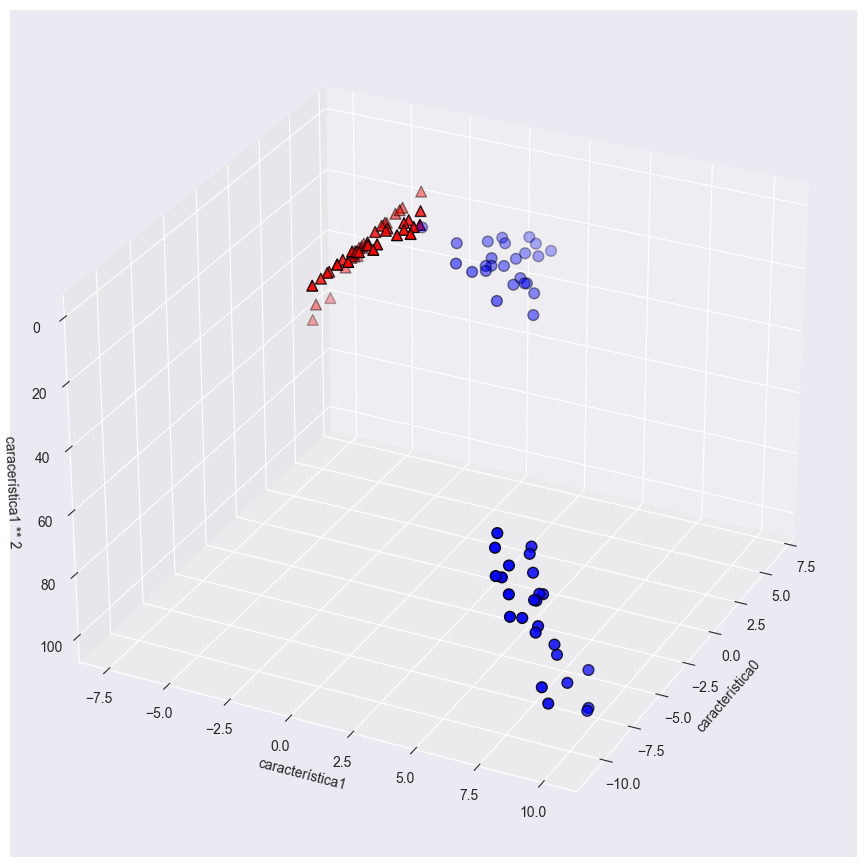

In [26]:
X_new = np.hstack( [X, X[:, 1:] ** 2] )
ax = plt.figure(figsize=(12,11)).add_subplot(projection='3d')
mascara = y == 0
ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b', cmap= cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r', marker='^', cmap=cm2, s=60, edgecolor='k')
ax.set_xlabel("característica0")
ax.set_ylabel("característica1")
ax.set_zlabel("caracerística1 ** 2")
ax.view_init(elev=-152., azim=-26, roll=0) # plt.show()

 ###  EJEMPLO 15: Dibujar el plano 3D que separa los datos de las dos clases.


C:\Users\ESP\AppData\Local\Temp\ipykernel_1940\765912724.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b',
C:\Users\ESP\AppData\Local\Temp\ipykernel_1940\765912724.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r',


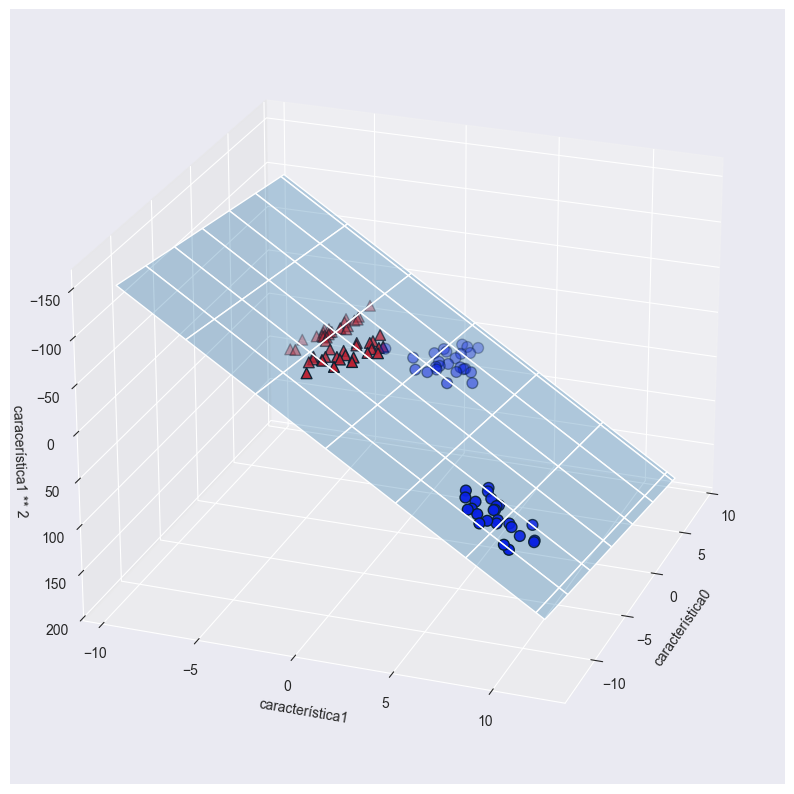

In [27]:
lineal_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = lineal_svm_3d.coef_.ravel(), lineal_svm_3d.intercept_
# Mostrar la frontera de decisión
ax = plt.figure(figsize=(10,11)).add_subplot(projection='3d')
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mascara, 0], X_new[mascara, 1], X_new[mascara, 2], c='b',
       cmap=cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mascara, 0], X_new[~mascara, 1], X_new[~mascara, 2], c='r',
       marker='^', cmap=cm2, s=60, edgecolor='k')
ax.set_xlabel("característica0")
ax.set_ylabel("característica1")
ax.set_zlabel("caracerística1 ** 2")
ax.view_init(elev=-156., azim=-20, roll=0) # plt.show()

### EJEMPLO 16: Dibujar las superficies de decisión en 2D.


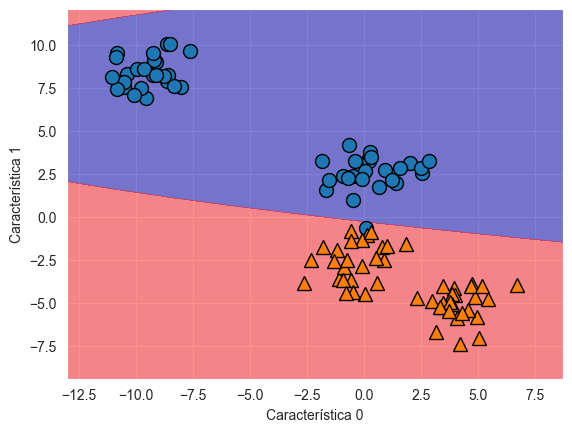

In [28]:
ZZ = YY ** 2
dec = lineal_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap= cm2,
alpha=0.5)
discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")
plt.show()

### EJEMPLO 17: Crear una SVC, entrenarla y mostrar su frontera de decisión

In [29]:
def crea_dataset_revuelto():
    X, y = make_blobs(centers=2, random_state=semilla, n_samples=30)
    y[np.array([7, 27])] = 0
    mascara = np.ones(len(X), dtype=bool)
    mascara[np.array([0, 1, 5, 26])] = 0
    X, y = X[mascara], y[mascara]
    return X, y

Text(0, 0.5, 'Característica 1')

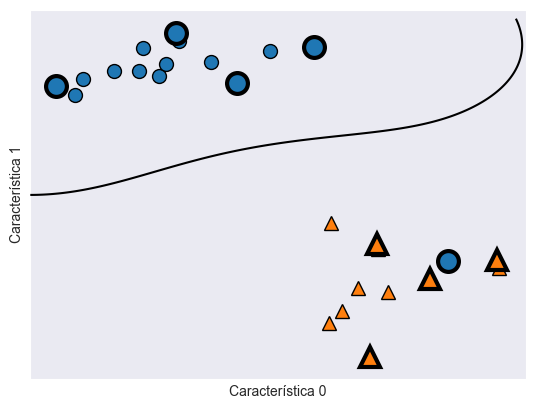

In [30]:
X, y = crea_dataset_revuelto()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
plot_2d_separator(svm, X, eps=.5)
discrete_scatter(X[:, 0], X[:, 1], y)
# Dibujar los vectores soporte
sv = svm.support_vectors_
# La clase de los ectores soporte lo indica el signo de los coeficientes duales
sv_labels = svm.dual_coef_.ravel() > 0
discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Característica 0")
plt.ylabel("Característica 1")

### EJEMPLO 18: Crear una SVC y añadir características polinomiales antes de entrenarla.


C:\Users\ESP\Desktop\MachineLearning\saa\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


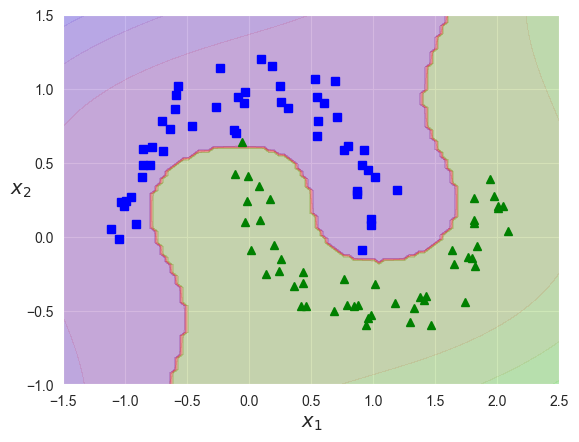

In [31]:
 # -*- coding: utf-8 -*
X, y = make_moons(n_samples=100, noise=0.10, random_state=semilla)
svm_poli = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])
svm_poli.fit(X, y)
plot_predicciones(svm_poli, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### EJEMPLO 19: Volvemos a usar el dataset moons pero ahora usando un kernel polinomial.


In [ ]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=semilla) # Crea dataset
# Definir y entrenar un SVC con kernel polinomial de grado 3, coef0 1 y C=5
kernel_poli = Pipeline([
      ("scaler", StandardScaler()),
      ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])
kernel_poli.fit(X, y)
# Definir y entrenar un SVC con kernel polinomial de grado 10, coef0 100 y C=5
kernel_poli100 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
kernel_poli100.fit(X, y)
# Dibujar las superficies de clasificación de ambos
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)
plt.sca(axes[0])
plot_predicciones(kernel_poli, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$grado=3, coef0=1, C=5$", fontsize=14)
plt.sca(axes[1])
plot_predicciones(kernel_poli100, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$grado=10, coef0=100, C=5$", fontsize=14)
plt.ylabel("")
plt.show()

### EJEMPLO 20: Con el dataset moons usamos kernel RBF.

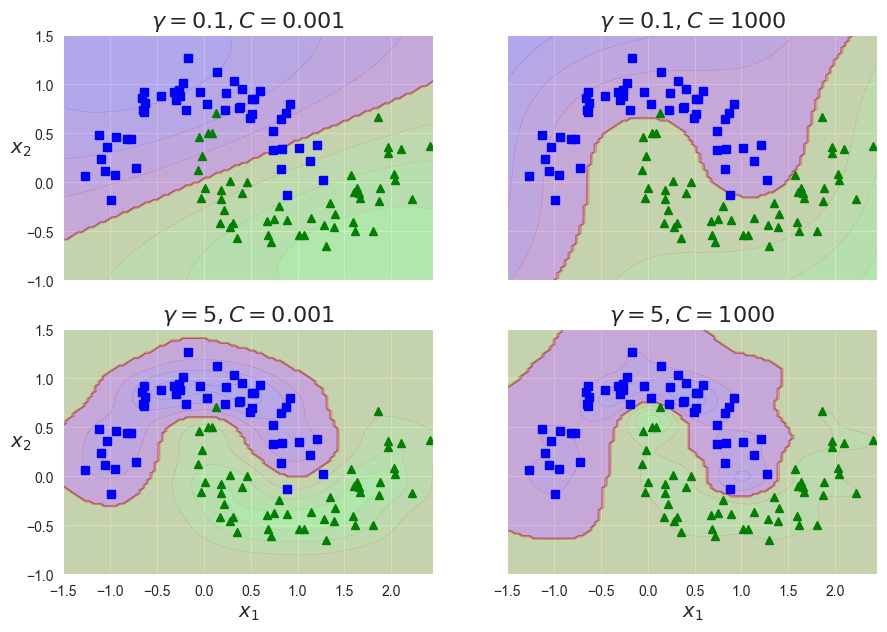

In [142]:
X, y = make_moons(n_samples=100, noise=0.15, random_state=semilla)  # Crea dataset

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hiperparametros = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hiperparametros:
    svm_kernel_rbf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
    ])
    svm_kernel_rbf.fit(X, y)
    svm_clfs.append(svm_kernel_rbf)

fig, ejes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(ejes[i // 2, i % 2])
    plot_predicciones(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hiperparametros[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show() # added to show the plot

 ### EJEMPLO 21: Regresión lineal con SVM.


In [ ]:
# Definir los datos de entrenamiento
np.random.seed(semilla)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Entrenar los SVM para regresión
svm_reg1 = LinearSVR(epsilon=1.5, random_state=semilla)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=semilla)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

In [ ]:
def encontrar_vectores_soporte(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    fuera_de_margen = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(fuera_de_margen)

svm_reg1.support_ = encontrar_vectores_soporte(svm_reg1, X, y)
svm_reg2.support_ = encontrar_vectores_soporte(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regresion(svm_reg, X, y, ejes):  # Puedes llevarte esta a U03_tools.py
    x1s = np.linspace(ejes[0], ejes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(ejes)

fig, ejes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(ejes[0])
plot_svm_regresion(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=16)
plt.ylabel(r"$y$", fontsize=16, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
             textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
            )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=18)

plt.sca(ejes[1])
plot_svm_regresion(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=16)
plt.show()

In [ ]:
svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

### EJEMPLO 22: Añade estas sentencias detrás de las últimas del EJEMPLO 21.

In [ ]:
# Definir los datos de entrenamiento
np.random.seed(semilla)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

# Entrenar los SVM para regresión
svm_reg1 = LinearSVR(epsilon=1.5, random_state=semilla)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=semilla)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def encontrar_vectores_soporte(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    fuera_de_margen = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(fuera_de_margen)

svm_reg1.support_ = encontrar_vectores_soporte(svm_reg1, X, y)
svm_reg2.support_ = encontrar_vectores_soporte(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regresion(svm_reg, X, y, ejes):  # Puedes llevarte esta a U03_tools.py
    x1s = np.linspace(ejes[0], ejes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(ejes)

fig, ejes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

plt.sca(ejes[0])
plot_svm_regresion(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=16)
plt.ylabel(r"$y$", fontsize=16, rotation=0)
plt.annotate('', xy=(eps_x1, eps_y_pred), xycoords='data',
             xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
             textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
            )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=18)

plt.sca(ejes[1])
plot_svm_regresion(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=16)
# plt.show()

###  EJEMPLO 23: Detección de outliers usando One-class SVM.


In [ ]:
X, y = make_blobs(n_features=2, centers=3, n_samples=500, random_state=semilla)
print("Formato de los datos de entrenamiento:", X.shape)
print("Primeros 3 datos:\n", X[:3,:])
plt.figure()
plt.scatter(X[:, 0], X[:, 1])  # plt.show()

# Detectar outliers
nu = 0.05
# Suponemos que hay un 5% de datos anómalos

svm_oc = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu)
svm_oc.fit(X)
X_outliers = X[svm_oc.predict(X) == -1]
print("Outliers detectados:\n", X_outliers)

# Definir rejilla para marcar la frontera de decisión
n_ejemplos, n_caracteristicas = X.shape
X_range = np.zeros((n_caracteristicas, 2))
X_range[:, 0] = np.min(X, axis=0) - 1.
X_range[:, 1] = np.max(X, axis=0) + 1.
h = 0.1
# Tamaño de paso de la rejilla
x_min, x_max = X_range[0]
y_min, y_max = X_range[1]
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]

# Dibujar la frontera y marcar de rojo los outliers
alfa_set = 0.95
Z_ocsvm = svm_oc.decision_function(grid)
Z_ocsvm = Z_ocsvm.reshape(xx.shape)
plt.figure()
c_0 = plt.contour(xx, yy, Z_ocsvm, levels=[0], colors='red', linewidths=3)
plt.clabel(c_0, inline=1, fontsize=12, fmt={0: str(alfa_set)})
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red')
plt.legend()
# plt.show()

# En el one-class SVM, no todos los vectores soporte son outliers
X_SV = X[svm_oc.support_]
n_SV = len(X_SV)
n_outliers = len(X_outliers)
print('{0:.2f} <= {1:.2f} <= {2:.2f}?'.format(
    1./n_ejemplos * n_outliers, nu, 1./n_ejemplos * n_SV))

# Marcamos los vectores soporte
plt.figure()
plt.contourf(xx, yy, Z_ocsvm, 10, cmap=plt.cm.Blues_r)
plt.scatter(X[:, 0], X[:, 1], s=1.)
plt.scatter(X_SV[:, 0], X_SV[:, 1], color='orange')  # plt.show()